# 棒球数据分析

## 初步了解数据集
MLB棒球数据集，内容包含了各个层面，包括从 1871 年到 2014 年完整的棒球赛击球和投球数据，还包括防守数据、排名、球队数据、管理记录、季后赛数据等等。由于棒球运动在中国并不是很流行，所以很多学生对棒球运动几乎一无所知，我也是这样，但是通过搜索了解，还是可以获得一些粗浅的棒球知识，可以从中找到自己想要分析的问题。

### 数据简介

1. BMI指数（即身体质量指数，简称体质指数又称体重，英文为Body Mass Index，简称BMI），是用体重公斤数除以身高米数平方得出的数字，是目前国际上常用的衡量人体胖瘦程度以及是否健康的一个标准。但是对于运动员来说，肥胖标准代表的可能是强壮。BMI = weight(kg)/height(m)`**`2
2. 服役年限：career_years = yearID - debut.dt.year
3. IsoP：纯长打率（英文：Isolated Power）纯长打率可用来评断一位打者的长打能力。纯长打率 = 长打率 - 打击率。其中打击率是棒球运动中，评量打者（击球员）成绩的重要指标。长打率为一般衡量长打能力的数字。字面上的解释应该是“出现长打的概率”，但事实上，更深层的意义是“每一次打击可以贡献几个垒包”。纯长打率计算公式如下：

![纯长打率公式](https://pic2.zhimg.com/80/v2-b7ec04720eec5c13e38b20669b80d891_1440w.png)

### 检查公式所需数据
通过检查，发现缺少一个数据：1B —— 一垒安打，查询[如何计算长打率](http://www.wikihow.com/Calculate-Slugging-Percentage)得到长打率替代公式：**`SLG = (H + 2B + (2 x 3B) + (3 x HR))/AB`**，即 **`IsoP = (H + 2B + (2 x 3B) + (3 x HR))/AB - H/AB`**

### 提出问题

1. 出生月份是否与成为明星球员有相关性？（受到冰球运动员的数据启发）
2. 身体条件（BMI标准体重）与纯长打率（衡量长打能力的指标）的相关性
3. 服役年限与当年纯长打率的相关性

### 问题预测

1. 没有明显猜测，只是单纯好奇，很大可能不相关
2. 猜测 BMI 值处于标准和偏胖的人（猜测这个范围内的人有更强的力量）有更好的长打能力体现
3. 对于运动员来说，通常在服役年限前期，应该是能力的上升期，而在服役年限的后期，应该是能力的下降区域。

## 熟悉具体数据集：

### 导入数据表
* 导入库

In [1]:
#导入库
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

* 从CSV文件中导入数据

In [2]:
beating_df  = pd.read_csv("baseballdatabank-master/core/Batting.csv")
players_df  = pd.read_csv("baseballdatabank-master/core/People.csv")
awards_players_df = pd.read_csv("baseballdatabank-master/core/AwardsPlayers.csv")

In [3]:
beating_df.info()
players_df.info()
awards_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107429 entries, 0 to 107428
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  107429 non-null  object 
 1   yearID    107429 non-null  int64  
 2   stint     107429 non-null  int64  
 3   teamID    107429 non-null  object 
 4   lgID      106691 non-null  object 
 5   G         107429 non-null  int64  
 6   AB        107429 non-null  int64  
 7   R         107429 non-null  int64  
 8   H         107429 non-null  int64  
 9   2B        107429 non-null  int64  
 10  3B        107429 non-null  int64  
 11  HR        107429 non-null  int64  
 12  RBI       106673 non-null  float64
 13  SB        105061 non-null  float64
 14  CS        83888 non-null   float64
 15  BB        107429 non-null  int64  
 16  SO        105329 non-null  float64
 17  IBB       70778 non-null   float64
 18  HBP       104612 non-null  float64
 19  SH        101360 non-null  float64
 20  SF  

### 熟悉数据
使用 info 查看数据信息，我们发现需要的数据项有：

#### `beating_df`
* playerID  —— 球员ID
* yearID —— 当年年份
* stint —— 球员在同一赛季的服役顺序
* G —— 比赛场数（Games）
* AB —— 打数（At Bats）打者完成一次打击，且这次打击并非是成功的牺牲触击、保送、高飞牺牲打的次数
* R —— 得分（Runs）合法及安全回到本垒的次数
* H —— 安打（Hits）在没有失误的情况下，打者把投手投出来的球，击出到界内，使打者本身能至少安全上到一垒
* 2B —— 二垒（Doubles）能使打者在没有守备失误的情况下，安全到达二垒的打击
* 3B —— 三垒（Triples）能使打者在没有守备失误的情况下，安全到达三垒的打击
* HR —— 本垒打（Homeruns）在没有失误的情况下，跑者一次跑完四个垒包

#### `players_df`
* playerID —— 球员ID
* birthYear —— 出生年
* birthMonth —— 出生月
* birthDay —— 出生日
* weight —— 体重（单位：磅 pound）
* height —— 身高（单位：英寸 inch）
* debut —— 在大联盟的首次出场日期
* finalGame —— 在大联盟的最后一场比赛日期（如果仍在活跃则为空）

#### `awards_players_df`
* playerID —— 球员ID
* awardID —— 奖项ID
* yearID —— 年份


### 数据整理
现在我们需要的数据都有了，那么根据我们提出的问题，将数据进行处理：
#### 问题1相关数据

In [4]:
#合并获奖球员信息和球员信息，获取每个球员的出生月份
award_process = pd.merge(awards_players_df.loc[:,['playerID','awardID']], players_df.loc[:,['playerID','birthMonth']], 
                         on=['playerID'], how='right')

#填充缺失值为0
players_type = award_process.fillna({'birthMonth':0})

#取出出生月份不等于0的数据，根据出生月份将数据分组，计数
players_type = players_type[players_type['birthMonth'] != 0]
players_grouped = players_type.groupby(['birthMonth']).agg(['count'])
players_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12 entries, 1.0 to 12.0
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   (playerID, count)  12 non-null     int64
 1   (awardID, count)   12 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


#### 问题2相关数据
公式：
* IsoP = (H + 2B + (2 x 3B) + (3 x HR))/AB - H/AB     
* BMI = weight(kg)/(height(m)/*height(m))

In [5]:
#累加每个球员的所有能力指标数据备用
beating_select = beating_df[['playerID','AB','H','2B','3B','HR']]
beating_grouped = beating_select.groupby(['playerID'], as_index = False).sum()

#AB打数太少，计算纯长打率的价值不大，截取AB大于100的数据进行研究
beating_grouped = beating_grouped[beating_grouped['AB'] > 100]

#按公式进行向量计算，求IsoP
beating_grouped["IsoP"] = (beating_grouped['H'] + beating_grouped['2B'] + (2 * beating_grouped['3B']) + (3 * beating_grouped['HR'])) / beating_grouped['AB'] - beating_grouped['H'] / beating_grouped['AB'] 

#截取IsoP大于0的数据进行分析并查看各项描述统计学数据
beating_grouped = beating_grouped[beating_grouped['IsoP'] > 0]
beating_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8951 entries, 1 to 19687
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  8951 non-null   object 
 1   AB        8951 non-null   int64  
 2   H         8951 non-null   int64  
 3   2B        8951 non-null   int64  
 4   3B        8951 non-null   int64  
 5   HR        8951 non-null   int64  
 6   IsoP      8951 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 559.4+ KB


In [6]:
#选择球员数据中的身高和体重，填充空值为0
players_select = players_df[['playerID','weight','height']].fillna(0)

#选择身高和体重数据大于0的球员，转换身高和体重的单位
players_select = players_select[(players_select['weight']>0) & (players_select['height']>0)]
players_select['weight_kg'] = players_select['weight'] * 0.4535924
players_select['height_m'] = players_select['height'] * 0.0254
del players_select['weight']
del players_select['height']

#按照公式求 BMI
players_select['BMI'] = players_select['weight_kg'] / (players_select['height_m'] * players_select['height_m'])
players_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19007 entries, 0 to 19877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   playerID   19007 non-null  object 
 1   weight_kg  19007 non-null  float64
 2   height_m   19007 non-null  float64
 3   BMI        19007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 742.5+ KB


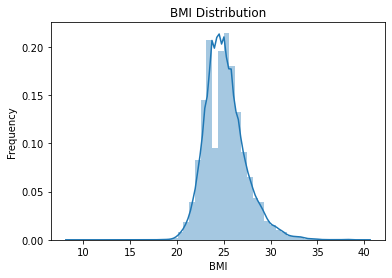

In [7]:
#BMI值直方图分布
sns.distplot(players_select['BMI'])
plt.title('BMI Distribution')
plt.ylabel('Frequency');

根据以上分布情况，发现球员基本上处于20-35的区间内，这也是有道理的，因为运动员需要有基本的身体素质，所以可以只在标准、超重和肥胖的范围内分析。

In [8]:
#合并以上两个处理后的数据集，选取需要的数据项
beating_players_df = pd.merge(beating_grouped.loc[:,['playerID','IsoP']], players_select.loc[:,['playerID','BMI']], 
                              on=['playerID'], how='inner')

# 按照(18.5,23],(23,25],(25,27],(27,30],(30,40]分类，对应名称'Normal_1','Normal_2','Overweight_1','Overweight_2','Obese'
# 对应标准1、标准2、超重1、超重2、肥胖（对于运动员来说应该是强壮，以下用强壮代指Obese阶段）
bmi_array = beating_players_df['BMI']
bins = [18.5,23,25,27,30,40]
bmi_level = ['Normal_1','Normal_2','Overweight_1','Overweight_2','Obese']
beating_players_df['BMI_level'] = pd.cut(beating_players_df['BMI'], bins,labels = bmi_level)
beating_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   playerID   8807 non-null   object  
 1   IsoP       8807 non-null   float64 
 2   BMI        8807 non-null   float64 
 3   BMI_level  8804 non-null   category
dtypes: category(1), float64(2), object(1)
memory usage: 284.0+ KB


通过 beating_players_df.info() 我们看到 BMI_level 只有 2 项缺失值，说明只有 2 个数据没有被我们的分组包含在内，这是可以接受的。我们可以将缺失值的数据项去掉。

In [9]:
#滤除缺失数据
beating_players_df = beating_players_df.dropna()
beating_players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   playerID   8804 non-null   object  
 1   IsoP       8804 non-null   float64 
 2   BMI        8804 non-null   float64 
 3   BMI_level  8804 non-null   category
dtypes: category(1), float64(2), object(1)
memory usage: 283.9+ KB


#### 问题3相关数据

In [10]:
#选出问题3需要的数据项
players_select2 = players_df[['playerID','debut']]
beating_select2 = beating_df[['playerID','yearID','AB','H','2B','3B','HR']]

#按每个队员每年来分组，计算各项指标和（因为球员每年也有可能不只在一个球队）
beating_grouped2 = beating_select2.groupby(['playerID','yearID'], as_index = False).sum()

#选出打数AB超过50的球员进行分析（太少没有参考价值，可能不是专职击球员）
beating_grouped2 = beating_grouped2[beating_grouped2['AB'] > 50]

#按照公式计算每年的IsoP，选择1995年之后的数据进行研究（1995年后是新赛制规则，避免因为赛制规则产生的变化）
beating_grouped2['IsoP'] = (beating_grouped2['H'] + beating_grouped2['2B'] + (2 * beating_grouped2['3B']) + (3 * beating_grouped2['HR'])) / beating_grouped2['AB'] - beating_grouped2['H'] / beating_grouped2['AB']
beating_grouped2 = beating_grouped2[(beating_grouped2['IsoP'] > 0)&(beating_grouped2['yearID'] > 1995)]

#合并球员服役数据和球员每年的IsoP指标数据
beating_players_year = pd.merge(beating_grouped2.loc[:,['playerID','yearID','IsoP']], players_select2.loc[:,['playerID','debut']], 
                              on=['playerID'], how='inner')

#用我们之前定义的 parse_date 函数将 debut 转换为日期格式
beating_players_year['debut'] = pd.to_datetime(beating_players_year['debut'])

#用当前yearID减去首次出场（debut）的年份，得出服役年限
beating_players_year['career'] = beating_players_year['yearID'] - beating_players_year['debut'].dt.year
del beating_players_year['yearID']
del beating_players_year['debut']
beating_players_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12448 entries, 0 to 12447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  12448 non-null  object 
 1   IsoP      12448 non-null  float64
 2   career    12448 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 389.0+ KB


### 数据分析
#### 问题1 分析

In [11]:
#查看待分析的数据集
players_grouped

,playerID,awardID
,count,count
birthMonth,,
1.0,1955,344
2.0,1828,436
3.0,1962,481
4.0,2061,678
5.0,2009,605
6.0,1715,390
7.0,1896,426
8.0,2345,567


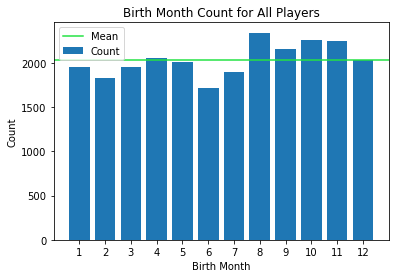

In [12]:
#所有球员的生日月份分布，绿色线是每个出生月份的球员平均值
p1 = plt.bar(players_grouped.index, players_grouped[('playerID', 'count')])
plt.axhline(y=players_grouped[('playerID', 'count')].mean(), color = '#23e342',label='Mean')
plt.xticks(range(1,13),range(1,13))
plt.legend(['Mean','Count'])
plt.ylabel('Count')
plt.xlabel('Birth Month')
plt.title('Birth Month Count for All Players');

整体球员的分布，相对比较均匀。下面查看一下获奖球员的分布

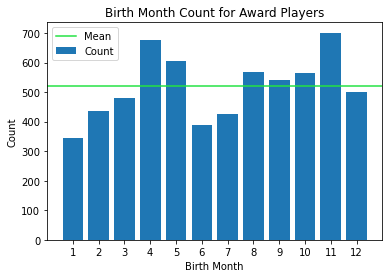

In [13]:
#获奖球员的生日月份分布，绿色线是每个出生月份的获奖球员平均值
p2 = plt.bar(players_grouped.index, players_grouped[('awardID', 'count')])
plt.axhline(y=players_grouped[('awardID', 'count')].mean(), color = '#23e342',label='Mean')
plt.xticks(range(1,13),range(1,13))
plt.legend(['Mean','Count'])
plt.ylabel('Count')
plt.xlabel('Birth Month')
plt.title('Birth Month Count for Award Players');

获奖球员中看到，1、6、7月较为偏低，而4、5、11月则较为偏高，因为每个月份的球员总数不同，我们可以查看一下每个出生月份，获奖球员占总体球员的比例

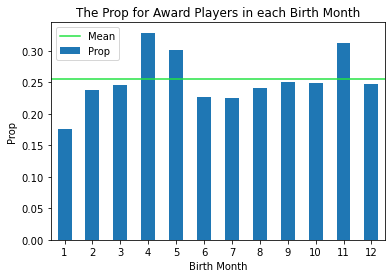

In [14]:
#每个出生月，获奖球员占总球员比例分布，绿色线为获奖球员占全体球员的比例
ax = (players_grouped[('awardID', 'count')]/players_grouped[('playerID', 'count')]).plot(kind='bar')
plt.axhline(y=(players_grouped[('awardID', 'count')].sum()*1.0)/
            (players_grouped[('playerID', 'count')].sum()*1.0), color = '#23e342' ,label='Mean')
plt.xticks(range(0,12),range(1,13),rotation=0)
plt.legend(['Mean','Prop'])
plt.ylabel('Prop')
plt.xlabel('Birth Month')
plt.title('The Prop for Award Players in each Birth Month');

#### 问题1 结论
通过以上可视化可以看出，1月份的获奖球员占比最低，而4、5、11月的占比突出得高，这跟我们一开始的猜测不太相符，我们猜测应该是相对均匀的分布。那么有什么原因导致该现象？通过查询相关的资料，棒球球员在年龄较小的时候，都是在自己的学校球队接受棒球的训练，而没有像冰球运动员那样有个固定的选拔，最终没有找到确切的原因，很遗憾。

#### 问题2 分析

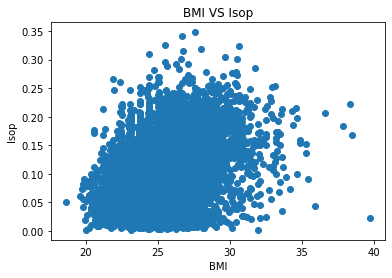

In [15]:
# 直接通过点状图查看 BMI 值和 IsoP 值的相关性
plt.scatter(beating_players_df['BMI'], beating_players_df['IsoP'])
plt.xlabel('BMI')
plt.ylabel('Isop')
plt.title('BMI VS Isop');

通过点状图看不出什么明显的相关性，我们查看一下BMI值分组后的信息，以下几个图表分别是：
* 每个BMI_level的IsoP的均值分布
* 每个BMI_level的IsoP的箱线图比较

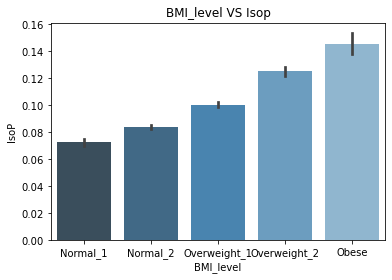

In [16]:
sns.barplot(beating_players_df['BMI_level'], beating_players_df['IsoP'], palette="Blues_d")
plt.title('BMI_level VS Isop');

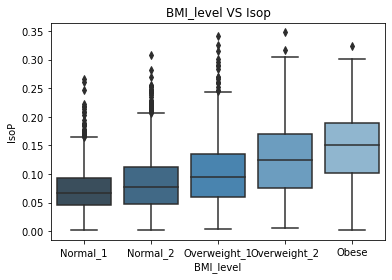

In [17]:
sns.boxplot(x="BMI_level", y="IsoP", data=beating_players_df, palette="Blues_d", width=0.8)
plt.title('BMI_level VS Isop');

以上两个可视化图表都表现出了较为明显的正相关趋势，我们可以计算查看一下各项统计学信息

In [18]:
#按照BMI值的分组标准，计算每个分组内的各项统计学数据
isop_bmi_togroup = beating_players_df[['IsoP','BMI_level']]
functions = ['count','mean','median','max','min']
isop_bmi_grouped = isop_bmi_togroup.groupby(['BMI_level']).agg(functions)
isop_bmi_grouped

IsoP                                        
             count      mean    median       max       min
BMI_level                                                 
Normal_1       988  0.072308  0.066352  0.265406  0.002000
Normal_2      3294  0.083615  0.077858  0.308825  0.002334
Overweight_1  3029  0.100213  0.095238  0.341853  0.003247
Overweight_2  1254  0.125110  0.125086  0.347702  0.004785
Obese          239  0.145247  0.149975  0.323283  0.001938

按照以上信息，强壮等级的数量较少，其他几个阶段的样本量还是比较多的，比较有参考价值。根据图表可以看出一个正相关的趋势，我们可以用相关系数来证明一下这个结论是否合理：

In [19]:
np.corrcoef(beating_players_df['BMI'], beating_players_df['IsoP'])

array([[1.        , 0.33877634],
       [0.33877634, 1.        ]])

### 问题 2 结论
通过整理数据并可视化分析，可以看出，各 BMI 阶段的 IsoP 均值分布和箱线图的分布趋势，都是随着 BMI 阶段的提升而提升的。BMI 值和球员的长打能力确实有一定的正相关性。一开始的猜测为，标准和超重两个范围内会较强，这个有点想当然了，运动员基本上不会有极端的体形，本来就集中在标准和超重这两个范围内。而在这些范围内，BMI 和 IsoP 呈现了一定的正相关。通过计算相关系数，得到了0.3388（保留 4 位小数），在相关系数的范围判断上，小于 0.3 表示两者相关程度极弱，大于等于 0.3 且小于 0.5 为中度相关，而我们得到了一个近似 0.3 的结果，可以得出两者有较弱的正相关关系。即 BMI 值越高，运动员的纯长达能力就有（较小的）可能越强。

#### 问题3 分析

In [20]:
#按照服役年数进行分组，查看分组后的各组数量
beating_players_year_count = beating_players_year.groupby(['career']).count()
beating_players_year_count

,playerID,IsoP
career,,
0,1106,1106
1,1265,1265
2,1280,1280
3,1196,1196
4,1134,1134
5,1016,1016
6,940,940
7,837,837
8,721,721


服役年限越长，样本数量级越小，服役 15 年以上的基本上都很少了，数量级少的时候，纯长打率的分布比较分散，不太有参考价值。可以截取前 15 年的数据看一下分布情况。

In [21]:
#截取服役0-15年的数据
beating_players_year = beating_players_year[(beating_players_year['career'] >= 0)&(beating_players_year['career']<=15)]

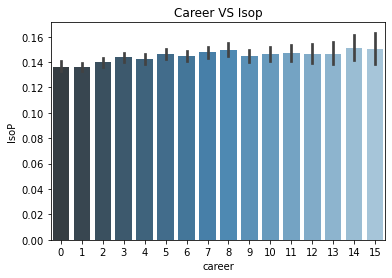

In [22]:
#随着服役年限的递增，IsoP的均值分布
sns.barplot(beating_players_year['career'], beating_players_year['IsoP'], palette="Blues_d")
plt.title('Career VS Isop');

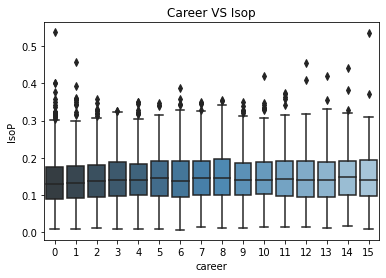

In [23]:
#随着服役年限的递增，IsoP的箱线图分布
sns.boxplot(x="career", y="IsoP", data=beating_players_year, palette="Blues_d")
plt.title('Career VS Isop');

单纯看 0-3 年的数据情况，可以看到均值和中位数都是递增的，然而幅度很小。对于 0-15 年整体来看，每年纯长打率均值和箱线图分布，可以看出没有特别大的变化，并不能证明这个范围内有什么正相关或负相关。那么我们来计算一下相关系数看看：

In [24]:
#整体的相关系数
np.corrcoef(beating_players_year['career'], beating_players_year['IsoP'])

array([[1.        , 0.05658674],
       [0.05658674, 1.        ]])

可以看到这个相关系数是非常小的，可以视为不相关，那么我们来看一下前4年的相关性：

In [25]:
beating_players_year = beating_players_year[(beating_players_year['career'] >= 0)&(beating_players_year['career']<=3)]
np.corrcoef(beating_players_year['career'], beating_players_year['IsoP'])

array([[1.        , 0.04518252],
       [0.04518252, 1.        ]])

0-3年的相关系数甚至更小了，看来可视化图表上的微小上升趋势并不能说明它们具有相关性。

#### 问题3结论
通过可视化和相关系数的计算，虽然对于棒球运动来说，运动员的运动生涯已经比其他的运动项目的时间长，然而如果一个人在经历过自己的能力高峰之后，状态下滑太明显，可能就会选择退役，或者被球队所淘汰了。所以整体没有一个特别大的变化也是比较合理的。

## 总结

### 问题结论汇总

1. 出生月份是否与成为明星球员有相关性？提出问题只是因为冰球运动员的那个数据分析结论，猜测不相关，实际1月份确实分布较小，4、5、11 月分布较多，具体原因未查明。
2. 身体条件（BMI标准体重）与纯长打率（衡量长打能力的指标）的相关性？猜测处于标准和超重的人有更好的长打能力。事实是，大部分的球员都处于这两个范围内，而在将标准和超重分别分为两部分，再加上“肥胖”，一共5个范围分析后发现，BMI值越高的范围，纯长打率越可能高，长达能力越强。（均值，中位数，箱线图分布证明有相关性，相关系数证明相关性较小）
3. 服役年限与当年纯长打率的相关性？猜测为服役前期上升，服役后期下降。然而整体来看没有特别大的差异，相关系数也特别小。对于运动员来说，如果后期能力下降太多，可能就会选择退役了，如果退役，就没有了数据体现。

### 局限性和改进空间

1. 对棒球运动不是足够了解，很多相关知识只是通过搜素引擎来获取，不一定准确，对棒球运动更了解，才更能明白每个数据的真正内涵。这告诉了我们一个道理，对于数据分析师来说，数据分析是需要建立在具体业务之上的。不是所有的数据都可以直接拿来分析，需要对数据集有更深的了解，才能更深层次地挖掘数据中的秘密！
2. BMI值，对于运动员来说，超重和肥胖，其实代表了身体的脂肪和肌肉两种物质，在本次分析中，更多是看作“BMI值越大，运动员越强壮，肌肉越发达”。如果有真正的可以衡量运动员肌肉的数据，那么相关性可能会更大一点。
3. 每年的纯长打率随着服役年限的变化，是否有相应的变化。这个问题研究的是整体数据，按照服役年限分组，有可能同一组中的球员是不同时代的球员，虽然有控制截取1995年以后的球员数据，然而影响纯长打率有很多其他因素没有得到控制，单纯只分析服役年限和当年的纯长打率，可参考性并不大。如果想要证明运动员前期是状态提升期，后期是状态下降期，也不能只看纯长打率，应该是全面提升的，或者针对不同部位的球员，不同的能力有对应的提升和下降。要区分不同的场上位置，而且很多球员也会随着时间的推移改变自己的场上位置。比较复杂，对棒球数据还是需要进一步的了解才能解决这个问题了。

## 参考网站：
1. [轻松看懂棒球统计数据-打击数据篇](http://terryex.pixnet.net/blog/post/36215363)
2. [棒球统计-维基百科](https://zh.wikipedia.org/wiki/%E6%A3%92%E7%90%83%E7%B5%B1%E8%A8%88)
3. [《点球成金》豆瓣电影](https://movie.douban.com/subject/3023164/)
4. [浅谈如何判别打击三围](https://www.sportsv.net/articles/13549)
5. [打击三围-台湾棒球维基馆](http://twbsball.dils.tku.edu.tw/wiki/index.php/%E6%89%93%E6%93%8A%E4%B8%89%E5%9C%8D)
6. [如何计算长打率](http://www.wikihow.com/Calculate-Slugging-Percentage)
7. [纯长打率-维基百科](https://zh.wikipedia.org/wiki/%E7%B4%94%E9%95%B7%E6%89%93%E7%8E%87)